## Matrix multiplication from foundations

从基础开始的矩阵乘法

The *foundations* we'll assume throughout this course are:

- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get data

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')

path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
path_gz

WindowsPath('data/mnist.pkl.gz')

[urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) - (read the docs!)

In [4]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [5]:
#!ls -l data
!dir data


 驱动器 D 中的卷是 新加卷
 卷的序列号是 D47C-6D89

 D:\AI-python\course22p2-master\course22p2-master\nbs\data 的目录

2024/03/24  18:37    <DIR>          .
2024/03/24  18:37    <DIR>          ..
2024/03/24  18:37        17,051,982 mnist.pkl.gz
               1 个文件     17,051,982 字节
               2 个目录 372,877,582,336 可用字节


In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

pickle.load(f, encoding='latin-1'): 这部分使用了 Python 的 pickle 模块中的 load 函数，它用于从文件中加载 Python 对象。在这里，它被调用以从文件 f 中加载数据。encoding='latin-1' 是指定 pickle 使用的编码方式，在这里是 Latin-1 编码。

((x_train, y_train), (x_valid, y_valid), _): 这部分是解压缩后的数据被赋值给的变量。从代码来看，这个文件中保存了两个训练集和验证集的元组，以及一个不需要的第三个元素（因此使用 _ 表示）。这样，(x_train, y_train) 和 (x_valid, y_valid) 分别代表了训练集和验证集的特征和标签。

In [7]:
x_train.shape
y_train.shape

(50000,)

In [8]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [9]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [10]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

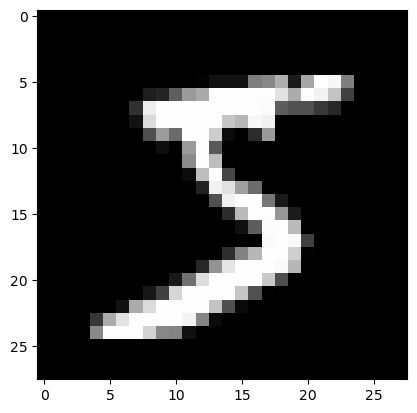

In [11]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

[islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [15]:
from itertools import islice

In [16]:
it = iter(vals)
islice(it, 5)

在这里，it 可能是一个可迭代对象，而 islice(it, 5) 则是从该可迭代对象中选择前5个元素。

In [17]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [18]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [19]:
list(islice(it, 5))

[]

In [31]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

这段代码使用了迭代器和匿名函数来构建一个循环，从迭代器 it 中按照每次取出28个元素的方式，生成一个包含若干个28元素列表的列表。让我来解释一下：

lambda: list(islice(it, 28))：这是一个匿名函数，定义了一个函数，它不接受任何参数，每次调用时从迭代器 it 中获取28个元素并转换为列表。

iter() 函数：将匿名函数转换为迭代器。

list(iter(lambda: list(islice(it, 28)), []))：这行代码使用 iter() 函数将匿名函数转换为迭代器，然后通过调用 list() 函数，循环执行匿名函数，每次执行得到一个包含28个元素的列表，直到匿名函数返回空列表为止。最终，将这些列表组成的迭代器转换为列表。

这样，最终的结果是一个包含若干个28个元素列表的列表。

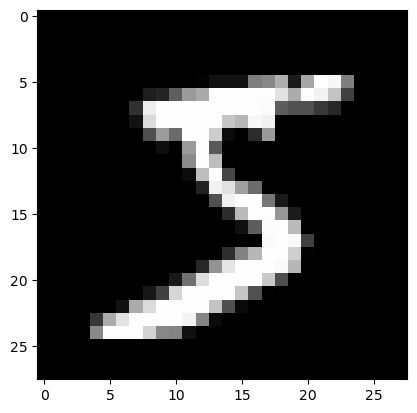

In [32]:
plt.imshow(img);

## Matrix and tensor

In [33]:
img[20][15]

0.98828125

In [34]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [35]:
m = Matrix(img)
m[20,15]

0.98828125

In [36]:
import torch
from torch import tensor

In [37]:
tensor([1,2,3])

tensor([1, 2, 3])

In [38]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

C:\Users\wl123\AppData\Local\Temp\ipykernel_22396\3800163648.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))


torch.Size([50000, 784])

In [39]:
x_train.type()

'torch.FloatTensor'

[Tensor](https://pytorch.org/docs/stable/tensors.html)

In [40]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

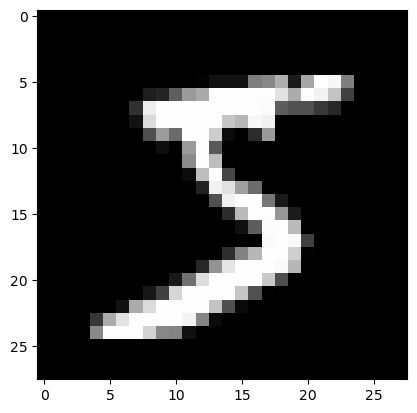

In [41]:
plt.imshow(imgs[0]);

In [42]:
imgs[0,20,15]

tensor(0.9883)

In [43]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [44]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [45]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

In [46]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [47]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [48]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [49]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [52]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

AttributeError: module 'os' has no attribute 'fork'

In [53]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

AttributeError: module 'os' has no attribute 'fork'

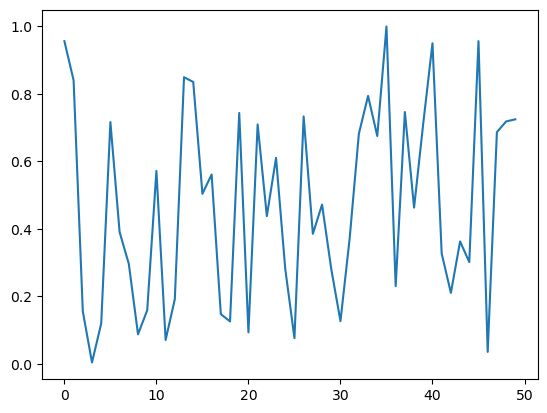

In [54]:
plt.plot([rand() for _ in range(50)]);

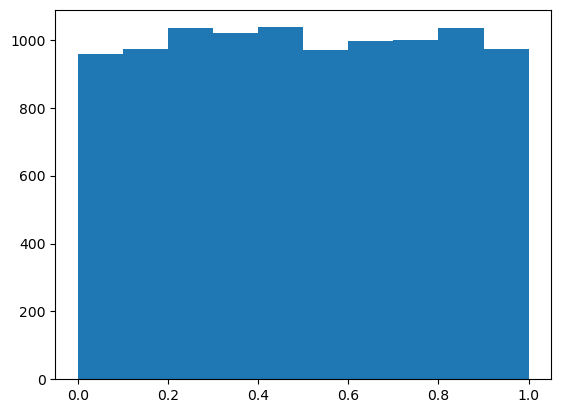

In [55]:
plt.hist([rand() for _ in range(10000)]);

In [56]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

4.21 ms ± 704 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 14.60 times longer than the fastest. This could mean that an intermediate result is being cached.
120 µs ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix multiplication

In [58]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [59]:
m1 = x_valid[:5]
# 从验证集中选取前 5 个样本
m2 = weights

In [60]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [61]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [62]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [63]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [64]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [65]:
t1.shape

torch.Size([5, 10])

In [66]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

torch.set_printoptions 是 PyTorch 中用于设置张量打印选项的函数。通过这个函数，你可以指定打印张量时的精度、行宽以及科学计数法等选项。

在你提供的代码中，设置了以下三个打印选项：

precision=2: 设置打印浮点数的精度为 2，即小数点后保留两位数字。

linewidth=140: 设置打印输出的行宽为 140，这意味着张量打印时每行最多可以显示 140 个字符。

sci_mode=False: 禁用科学计数法，这意味着当打印一个很大或很小的数时，不会使用科学计数法表示。

In [67]:
#举个例子
import torch

# 设置打印选项
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

# 创建一个张量
x = torch.tensor([1234567.89, 0.000123456789])

# 打印张量
print(x)


tensor([1234567.88,     0.00])


In [68]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [69]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [70]:
%time _=matmul(m1, m2)

CPU times: total: 859 ms
Wall time: 926 ms


In [71]:
ar*bc*ac

39200

## Numba

In [72]:
from numba import njit

In [73]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [74]:
from numpy import array

In [75]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: total: 156 ms
Wall time: 1.53 s


20.0

In [76]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: total: 0 ns
Wall time: 0 ns


20.0

Now only two of our loops are running in Python, not three:

In [77]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

这段代码定义了一个函数 matmul(a, b)，用于执行矩阵乘法操作。让我来解释一下：

def matmul(a, b):：这是一个函数定义，它定义了一个名为 matmul 的函数，接受两个参数 a 和 b，分别表示要相乘的两个矩阵。

(ar, ac), (br, bc) = a.shape, b.shape：这一行从输入的两个矩阵 a 和 b 中获取它们的形状（即行数和列数），并分别赋值给 (ar, ac) 和 (br, bc)。这里假设 a 和 b 是使用 PyTorch 或类似的库表示的张量或矩阵。

c = torch.zeros(ar, bc)：创建了一个零矩阵 c，其行数为 ar（矩阵 a 的行数）, 列数为 bc（矩阵 b 的列数）。这里假设使用的是 PyTorch 库，因此使用了 torch.zeros() 函数来创建一个全零张量。

for i in range(ar): 和 for j in range(bc):：这两个循环用于遍历结果矩阵 c 的每个元素的行和列索引。

c[i,j] = dot(a[i,:], b[:,j])：这行代码计算了矩阵乘法的每个元素。它通过调用 dot() 函数（可能是一个矩阵乘法的函数）来计算矩阵 a 的第 i 行和矩阵 b 的第 j 列的乘积，并将结果赋值给结果矩阵 c 的对应位置。

return c：返回计算结果矩阵 c。

总的来说，这个函数实现了矩阵乘法的基本操作，对于给定的两个矩阵 a 和 b，它返回它们的乘积矩阵。

In [78]:
m1a,m2a = m1.numpy(),m2.numpy()

In [79]:
from fastcore.test import *

In [80]:
test_close(t1,matmul(m1a, m2a))

In [81]:
%timeit -n 50 matmul(m1a,m2a)

423 µs ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise ops

[TryAPL](https://tryapl.org/)

In [82]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [83]:
a + b

tensor([12., 14.,  3.])

In [84]:
(a < b).float().mean()

tensor(0.67)

In [85]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste. This is the source LaTeX that I pasted to render the equation above:

```latex
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$
```

In [86]:
sf = (m*m).sum()
sf

tensor(285.)

In [87]:
sf.sqrt()

tensor(16.88)

In [88]:
m[2,:],m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [89]:
m[2]

tensor([7., 8., 9.])

In [90]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [91]:
test_close(t1,matmul(m1, m2))

In [92]:
%timeit -n 50 _=matmul(m1, m2)

1.51 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [93]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [94]:
test_close(t1,matmul(m1, m2))

In [95]:
%timeit -n 50 _=matmul(m1, m2)

1.04 ms ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

### Broadcasting with a scalar

In [96]:
a

tensor([10.,  6., -4.])

In [97]:
a > 0

tensor([ True,  True, False])

How are we able to do `a > 0`?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [98]:
a + 1

tensor([11.,  7., -3.])

In [99]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [100]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

### Broadcasting a vector to a matrix

Although broadcasting a scalar is an idea that dates back to APL, the more powerful idea of broadcasting across higher rank tensors [comes from](https://mail.python.org/pipermail/matrix-sig/1995-November/000143.html) a little known language called [Yorick](https://software.llnl.gov/yorick-doc/manual/yorick_50.html).

We can also broadcast a vector to a matrix:

In [119]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [120]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [121]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [122]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [123]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [124]:
t = c.expand_as(m)

In [125]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [126]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [127]:
t.storage()

 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [128]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [129]:
c

tensor([10., 20., 30.])

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [130]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

c.unsqueeze(0)：这个方法会在 c 的第 0 维度上增加一个维度。例如，如果 c 是一个形状为 (3, 4) 的张量或者数组，那么 c.unsqueeze(0) 将会得到一个形状为 (1, 3, 4) 的张量或者数组，即在最外层添加了一个维度。

c[None, :]：这是通过使用切片操作来实现维度扩展的一种简洁方式。None 表示在此位置插入一个新的轴（维度），相当于 c[np.newaxis, :]，其中 np.newaxis 是 NumPy 库中的特殊常量。这个表达式的效果和 c.unsqueeze(0) 是一样的，都是在第 0 维度上增加一个维度。

因此，这两个表达式的结果都是在 c 的维度上增加一个额外的维度，使得它的维度增加了一维。

In [131]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [132]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [133]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [134]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [135]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [137]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [136]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [138]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

### Broadcasting Rules

In [139]:
c[None,:]

tensor([[10., 20., 30.]])

In [140]:
c[None,:].shape

torch.Size([1, 3])

In [141]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [142]:
c[:,None].shape

torch.Size([3, 1])

In [143]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [144]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [145]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

## Matmul with broadcasting

In [146]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [147]:
digit[:,None].shape

torch.Size([784, 1])

In [148]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [149]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [150]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

In [151]:
test_close(t1,matmul(m1, m2))

In [152]:
%timeit -n 50 _=matmul(m1, m2)

234 µs ± 6.05 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


Our time has gone from ~500ms to <0.1ms, an over 5000x improvement! We can run on the whole dataset now.

In [153]:
tr = matmul(x_train, weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [154]:
tr.shape

torch.Size([50000, 10])

In [155]:
%time _=matmul(x_train, weights)

CPU times: total: 2.72 s
Wall time: 2.35 s


## Einstein summation

[Einstein summation](https://ajcr.net/Basic-guide-to-einsum/) ([`einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)) is a compact representation for combining products and sums in a general way. The key rules are:

- Repeating letters between input arrays means that values along those axes will be multiplied together.
- Omitting a letter from the output means that values along that axis will be summed.

In [156]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [158]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [159]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [160]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [161]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [162]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [163]:
%timeit -n 5 _=matmul(x_train, weights)

15.8 ms ± 897 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [164]:
test_close(tr, x_train@weights, eps=1e-3)

In [165]:
%timeit -n 5 _=torch.matmul(x_train, weights)

15.9 ms ± 835 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

In [166]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [167]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [168]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [169]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [170]:
from numba import cuda

In [171]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [172]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

@cuda.jit：这是 Python 中使用 CUDA 加速的一种方式，用于将函数编译成 CUDA 核函数。

def matmul(a, b, c):：这是定义了一个名为 matmul 的函数，接受三个参数 a、b 和 c，分别表示要相乘的两个矩阵以及结果矩阵。

i, j = cuda.grid(2)：这一行从 CUDA 网格中获取当前线程的索引。在二维网格中，i 和 j 分别表示行和列的索引。

if i < c.shape[0] and j < c.shape[1]:：这个条件判断语句用于确保当前线程的索引在结果矩阵 c 的范围内。

tmp = 0.：这一行初始化了一个临时变量 tmp，用于保存矩阵乘法的结果。

for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]：这是一个循环，用于计算矩阵乘法的每个元素。它遍历了矩阵 a 和 b 的相应行和列，并将乘积累加到临时变量 tmp 中。

c[i, j] = tmp：这一行将计算得到的乘积结果赋值给结果矩阵 c 的对应位置。

这个函数利用了 CUDA 的并行计算能力，通过多个线程同时计算矩阵乘法的不同部分，以提高计算效率。

In [177]:
r = np.zeros(tr.shape)
m1g,m2g,rg = map(cuda.to_device, (x_train,weights,r))

In [178]:
r.shape

(50000, 10)

In [179]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

这段代码计算了在 CUDA 加速下并行计算时需要的网格块数。让我解释一下：

TPB = 16：TPB 是一个常数，表示每个块（block）中的线程数（Threads Per Block）。

rr, rc = r.shape：这一行获取了矩阵 r 的行数和列数，并分别赋值给了 rr 和 rc。

blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))：这行代码计算了在给定线程数下，需要的网格块数。math.ceil() 函数用于向上取整，以确保足够的块数来覆盖整个矩阵 r。

blockspergrid：这是一个元组，包含了在每个维度上需要的网格块数。对于二维问题，通常使用 (row_blocks, column_blocks) 的形式来表示。

这段代码的目的是确保在 CUDA 加速计算中，矩阵 r 的每一行和每一列都被正确地分配到了相应的线程块中。

In [183]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1e-3)

In [184]:
%%timeit -n 10
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

19.1 ms ± 7.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [185]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [186]:
r=(m1c@m2c).cpu()

In [187]:
%timeit -n 10 r=(m1c@m2c).cpu()

The slowest run took 16.67 times longer than the fastest. This could mean that an intermediate result is being cached.
4.49 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Our broadcasting version was >500ms, and our CUDA version is around 0.5ms, which is another 1000x improvement compared to broadcasting. So our total speedup is around 5 million times!